<a href="https://colab.research.google.com/github/FernandaSzAdr/KNN_cromossome/blob/master/TesteRede1_Binaria_Base1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.optimizers import SGD
from keras.layers.core import Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [0]:
train_path = 'drive/My Drive/Base_CNN/Binarizado/Train'
test_path = 'drive/My Drive/Base_CNN/Binarizado/Test'
validation_path = 'drive/My Drive/Base_CNN/Binarizado/Validation'



---





*   Batch size = 32
*   Image size = 120x120



## Implementação

In [0]:
results = {}

In [0]:
bSize = 32

In [0]:
datagen = ImageDataGenerator(rescale=1/255.)

In [6]:
train_batches = datagen.flow_from_directory(train_path, target_size=(120, 120), 
                                            classes=['C', 'NC'], 
                                            batch_size=bSize)
test_batches = datagen.flow_from_directory(test_path, target_size=(120, 120), 
                                           classes=['C', 'NC'], 
                                           batch_size=bSize)
validation_batches = datagen.flow_from_directory(validation_path, 
                                                 target_size=(120, 120), 
                                                 classes=['C', 'NC'], 
                                                 batch_size=bSize)

Found 4228 images belonging to 2 classes.
Found 1324 images belonging to 2 classes.
Found 1072 images belonging to 2 classes.


In [0]:
stepsPerEpoche = len(train_batches)/bSize
validationSteps = len(validation_batches)/bSize

In [0]:
test_batches.class_indices

{'C': 0, 'NC': 1}



---



### 1 tentativa  Accuracy: 50.88%


**Descrição**


*   Modelo descrito no artigo "Crowdsourcing for Chromosome Segmentation and Deep Classification"



In [0]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(120, 120, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(16, (3, 3), activation='relu'),
    Conv2D(16, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(8, (3, 3), activation='relu'),
    Conv2D(8, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(1024, activation='sigmoid'),
    Dense(512, activation='sigmoid'),
   
    Dense(2, activation='softmax')
]
)

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_1.hdf5', verbose=1, save_best_only=True)

In [0]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 48s - loss: 0.7204 - acc: 0.4562 - val_loss: 0.6886 - val_acc: 0.5469

Epoch 00001: val_loss improved from inf to 0.68859, saving model to weights_architecture_1.hdf5
Epoch 2/50
 - 40s - loss: 0.6959 - acc: 0.5187 - val_loss: 0.7153 - val_acc: 0.4375

Epoch 00002: val_loss did not improve from 0.68859
Epoch 3/50
 - 41s - loss: 0.6902 - acc: 0.5250 - val_loss: 0.6887 - val_acc: 0.5469

Epoch 00003: val_loss did not improve from 0.68859
Epoch 4/50
 - 41s - loss: 0.7177 - acc: 0.4688 - val_loss: 0.7004 - val_acc: 0.4844

Epoch 00004: val_loss did not improve from 0.68859
Epoch 5/50
 - 41s - loss: 0.6983 - acc: 0.4813 - val_loss: 0.6961 - val_acc: 0.5000

Epoch 00005: val_loss did not improve from 0.68859
Epoch 6/50
 - 45s - loss: 0.6983 - acc: 0.5125 - val_loss: 0.7059 - val_acc: 0.4688

Epoch 00006: val_loss did not improve from 0.68859
Epoch 7/50
 - 41s - loss: 0.6733 - acc: 0.5812 - val_loss: 0.8641 - val_acc: 0.4531

Epoch 00007: val_loss did not improve from 0.68859
Epo

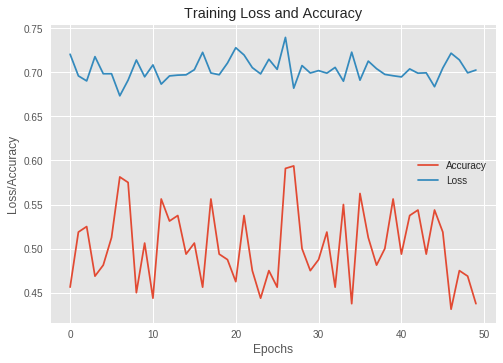

In [0]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_1.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_1.hdf5')

In [0]:
results['architecture_1'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 264s 8s/step


In [0]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_1'][0], 100 * results['architecture_1'][1]))

Test Loss: 0.6963587831705809 | Test Accuracy: 50.88%




---



### 2 tentativa Accuracy: 51.56%

**Descrição**


*   Modelo descrito no artigo "Crowdsourcing for Chromosome Segmentation and Deep Classification"
*   Alteração nas duas ultimas camadas Dense





In [0]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(120, 120, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(32, (3, 3), activation='relu'),
    Conv2D(32, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(16, (3, 3), activation='relu'),
    Conv2D(16, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
   
    Conv2D(8, (3, 3), activation='relu'),
    Conv2D(8, (3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(512, activation='relu'),
   
    Dense(2, activation='softmax')
]
)

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_2.hdf5', verbose=1, save_best_only=True)

In [0]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 2s - loss: 0.6875 - acc: 0.5753 - val_loss: 0.6962 - val_acc: 0.4375

Epoch 00001: val_loss improved from inf to 0.69617, saving model to weights_architecture_2.hdf5
Epoch 2/50
 - 1s - loss: 0.6970 - acc: 0.4688 - val_loss: 0.6911 - val_acc: 0.5469

Epoch 00002: val_loss improved from 0.69617 to 0.69113, saving model to weights_architecture_2.hdf5
Epoch 3/50
 - 1s - loss: 0.6937 - acc: 0.5125 - val_loss: 0.6917 - val_acc: 0.5469

Epoch 00003: val_loss did not improve from 0.69113
Epoch 4/50
 - 1s - loss: 0.6953 - acc: 0.4625 - val_loss: 0.6921 - val_acc: 0.5625

Epoch 00004: val_loss did not improve from 0.69113
Epoch 5/50
 - 1s - loss: 0.6946 - acc: 0.4813 - val_loss: 0.6927 - val_acc: 0.5625

Epoch 00005: val_loss did not improve from 0.69113
Epoch 6/50
 - 1s - loss: 0.6947 - acc: 0.4813 - val_loss: 0.6931 - val_acc: 0.4844

Epoch 00006: val_loss did not improve from 0.69113
Epoch 7/50
 - 1s - loss: 0.6933 - acc: 0.5000 - val_loss: 0.6930 - val_acc: 0.5156

Epoch 00007:

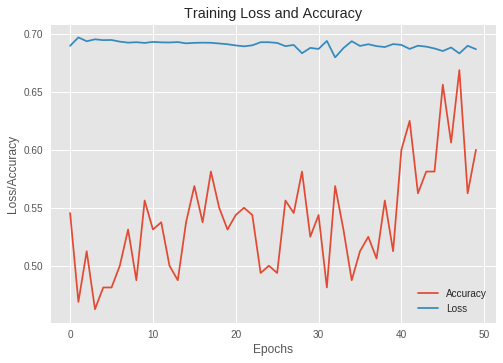

In [0]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_2.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_2.hdf5')

In [0]:
results['architecture_2'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 65s 2s/step


In [0]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_2'][0], 100 * results['architecture_2'][1]))

Test Loss: 0.6891512982547283 | Test Accuracy: 51.56%


### 3 tentativa Accuracy: 90.62%

Modelo criado pelo **Lucas Valentim**

https://github.com/lucasvalentim/chromosome-recognizer/blob/master/chromosome_recognizer.ipynb

In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_3.hdf5', verbose=1, save_best_only=True)

In [0]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 3s - loss: 2.0591 - acc: 0.5281 - val_loss: 0.7373 - val_acc: 0.5312

Epoch 00001: val_loss improved from inf to 0.73728, saving model to weights_architecture_3.hdf5
Epoch 2/50
 - 1s - loss: 1.0502 - acc: 0.6506 - val_loss: 0.6993 - val_acc: 0.6094

Epoch 00002: val_loss improved from 0.73728 to 0.69933, saving model to weights_architecture_3.hdf5
Epoch 3/50
 - 1s - loss: 1.1533 - acc: 0.6469 - val_loss: 1.4527 - val_acc: 0.4688

Epoch 00003: val_loss did not improve from 0.69933
Epoch 4/50
 - 1s - loss: 0.8386 - acc: 0.6781 - val_loss: 1.3443 - val_acc: 0.4531

Epoch 00004: val_loss did not improve from 0.69933
Epoch 5/50
 - 1s - loss: 0.7097 - acc: 0.7438 - val_loss: 1.3452 - val_acc: 0.5156

Epoch 00005: val_loss did not improve from 0.69933
Epoch 6/50
 - 1s - loss: 0.8142 - acc: 0.6688 - val_loss: 1.0452 - val_acc: 0.5312

Epoch 00006: val_loss did not improve from 0.69933
Epoch 7/50
 - 1s - loss: 0.7679 - acc: 0.6937 - val_loss: 1.1142 - val_acc: 0.4531

Epoch 00007:

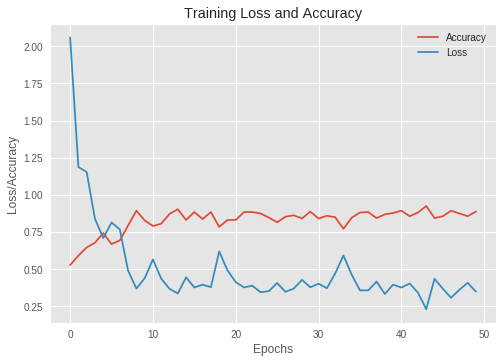

In [0]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_3.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_3.hdf5')

In [0]:
results['architecture_3'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 17s 521ms/step


In [0]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_3'][0], 100 * results['architecture_3'][1]))

Test Loss: 0.3269681357778609 | Test Accuracy: 90.62%


### 4 tentativa Accuracy: 88.18%

Modelo adaptado do **Lucas Albertins**

*   Sem os **dropout**


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_4.hdf5', verbose=1, save_best_only=True)

In [0]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 4s - loss: 0.4910 - acc: 0.7844 - val_loss: 1.4333 - val_acc: 0.6172

Epoch 00001: val_loss improved from inf to 1.43328, saving model to weights_architecture_4.hdf5
Epoch 2/50
 - 1s - loss: 0.3443 - acc: 0.8656 - val_loss: 1.0764 - val_acc: 0.6484

Epoch 00002: val_loss improved from 1.43328 to 1.07636, saving model to weights_architecture_4.hdf5
Epoch 3/50
 - 1s - loss: 0.3576 - acc: 0.8875 - val_loss: 0.9172 - val_acc: 0.6953

Epoch 00003: val_loss improved from 1.07636 to 0.91718, saving model to weights_architecture_4.hdf5
Epoch 4/50
 - 1s - loss: 0.4780 - acc: 0.8344 - val_loss: 0.8586 - val_acc: 0.6250

Epoch 00004: val_loss improved from 0.91718 to 0.85865, saving model to weights_architecture_4.hdf5
Epoch 5/50
 - 0s - loss: 0.3907 - acc: 0.8803 - val_loss: 0.5123 - val_acc: 0.7917

Epoch 00005: val_loss improved from 0.85865 to 0.51233, saving model to weights_architecture_4.hdf5
Epoch 6/50
 - 1s - loss: 0.4022 - acc: 0.8563 - val_loss: 0.5863 - val_acc: 0.8125



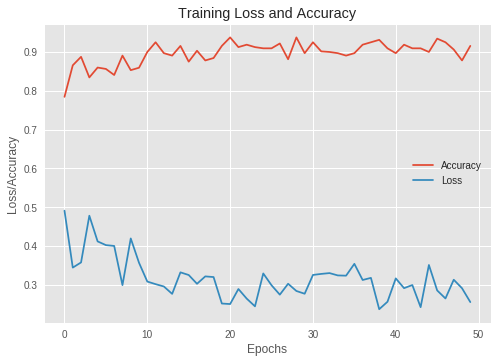

In [0]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_4.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_4.hdf5')

In [0]:
results['architecture_4'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 6s 181ms/step


In [0]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_4'][0], 100 * results['architecture_4'][1]))

Test Loss: 0.39068370359018445 | Test Accuracy: 88.18%


### 5 tentativa Accuracy: 89.60%

Modelo adaptado do **Lucas Albertins**

*   Sem os **dropout**
*   Função **SGD** para compilação


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_5.hdf5', verbose=1, save_best_only=True)

In [0]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 3s - loss: 3.1173 - acc: 0.4750 - val_loss: 1.0638 - val_acc: 0.5625

Epoch 00001: val_loss improved from inf to 1.06379, saving model to weights_architecture_5.hdf5
Epoch 2/50
 - 1s - loss: 2.1624 - acc: 0.4969 - val_loss: 0.7642 - val_acc: 0.5391

Epoch 00002: val_loss improved from 1.06379 to 0.76423, saving model to weights_architecture_5.hdf5
Epoch 3/50
 - 0s - loss: 1.2282 - acc: 0.5469 - val_loss: 0.7720 - val_acc: 0.5312

Epoch 00003: val_loss did not improve from 0.76423
Epoch 4/50
 - 0s - loss: 1.2432 - acc: 0.4969 - val_loss: 0.6996 - val_acc: 0.5781

Epoch 00004: val_loss improved from 0.76423 to 0.69959, saving model to weights_architecture_5.hdf5
Epoch 5/50
 - 0s - loss: 1.0430 - acc: 0.5625 - val_loss: 0.6661 - val_acc: 0.6250

Epoch 00005: val_loss improved from 0.69959 to 0.66611, saving model to weights_architecture_5.hdf5
Epoch 6/50
 - 0s - loss: 0.7916 - acc: 0.5969 - val_loss: 0.6721 - val_acc: 0.5938

Epoch 00006: val_loss did not improve from 0.6661

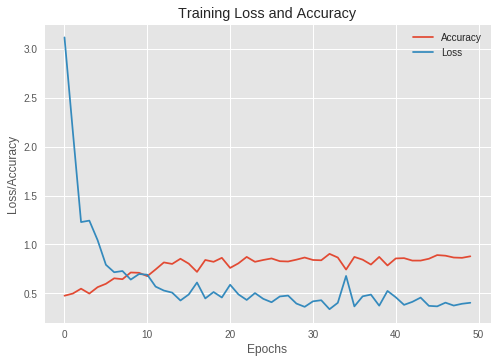

In [0]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_5.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_5.hdf5')

In [0]:
results['architecture_5'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 4s 113ms/step


In [0]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_5'][0], 100 * results['architecture_5'][1]))

Test Loss: 0.38777169305831194 | Test Accuracy: 89.60%


### 6 tentativa Accuracy: 91.85%

Modelo adaptado do **Lucas Albertins**

*   Sem os **dropout**
*   Função **SGD** para compilação
*   **BatchNormalization** antes da ultima camada Dense


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(SGD(lr=0.03, momentum=0.0, decay=0.0, nesterov=False), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_6.hdf5', verbose=1, save_best_only=True)

In [0]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 3s - loss: 0.5862 - acc: 0.7125 - val_loss: 1.0851 - val_acc: 0.5938

Epoch 00001: val_loss improved from inf to 1.08508, saving model to weights_architecture_6.hdf5
Epoch 2/50
 - 0s - loss: 0.4804 - acc: 0.8312 - val_loss: 0.9586 - val_acc: 0.8047

Epoch 00002: val_loss improved from 1.08508 to 0.95861, saving model to weights_architecture_6.hdf5
Epoch 3/50
 - 0s - loss: 0.3422 - acc: 0.8781 - val_loss: 0.4609 - val_acc: 0.8438

Epoch 00003: val_loss improved from 0.95861 to 0.46090, saving model to weights_architecture_6.hdf5
Epoch 4/50
 - 0s - loss: 0.3014 - acc: 0.9125 - val_loss: 0.4657 - val_acc: 0.7891

Epoch 00004: val_loss did not improve from 0.46090
Epoch 5/50
 - 0s - loss: 0.3817 - acc: 0.8812 - val_loss: 0.3769 - val_acc: 0.8594

Epoch 00005: val_loss improved from 0.46090 to 0.37688, saving model to weights_architecture_6.hdf5
Epoch 6/50
 - 0s - loss: 0.3280 - acc: 0.9156 - val_loss: 0.5303 - val_acc: 0.8203

Epoch 00006: val_loss did not improve from 0.3768

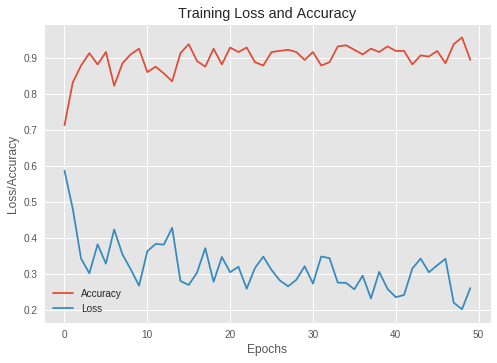

In [0]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_6.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_6.hdf5')

In [60]:
results['architecture_6'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 3s 94ms/step


In [61]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_6'][0], 100 * results['architecture_6'][1]))

Test Loss: 0.2917801181320101 | Test Accuracy: 91.85%


### 7 tentativa  Accuracy: 88.43%

Modelo adaptado do **Lucas Albertins**

*   Sem os **dropout**
*   Função **Adadelta** para compilação
*   **BatchNormalization** antes da ultima camada Dense


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adadelta

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_7.hdf5', verbose=1, save_best_only=True)

In [65]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 4s - loss: 0.5382 - acc: 0.7438 - val_loss: 1.8721 - val_acc: 0.5000

Epoch 00001: val_loss improved from inf to 1.87215, saving model to weights_architecture_7.hdf5
Epoch 2/50
 - 1s - loss: 0.4823 - acc: 0.8500 - val_loss: 0.5579 - val_acc: 0.7578

Epoch 00002: val_loss improved from 1.87215 to 0.55789, saving model to weights_architecture_7.hdf5
Epoch 3/50
 - 1s - loss: 0.3340 - acc: 0.9000 - val_loss: 0.5275 - val_acc: 0.8516

Epoch 00003: val_loss improved from 0.55789 to 0.52747, saving model to weights_architecture_7.hdf5
Epoch 4/50
 - 1s - loss: 0.2986 - acc: 0.8812 - val_loss: 1.0883 - val_acc: 0.6016

Epoch 00004: val_loss did not improve from 0.52747
Epoch 5/50
 - 1s - loss: 0.3632 - acc: 0.8812 - val_loss: 0.3948 - val_acc: 0.8672

Epoch 00005: val_loss improved from 0.52747 to 0.39481, saving model to weights_architecture_7.hdf5
Epoch 6/50
 - 1s - loss: 0.3431 - acc: 0.8812 - val_loss: 0.7640 - val_acc: 0.7734

Epoch 00006: val_loss did not improve from 0.3948

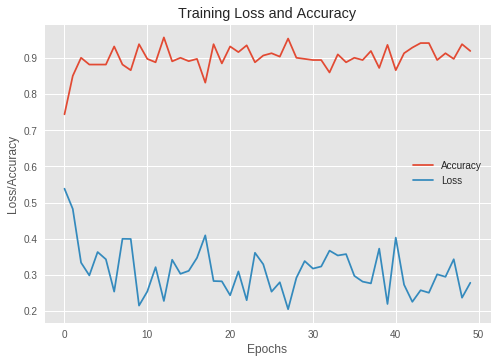

In [66]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_7.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_7.hdf5')

In [68]:
results['architecture_7'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 3s 104ms/step


In [69]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_7'][0], 100 * results['architecture_7'][1]))

Test Loss: 0.3544805417768657 | Test Accuracy: 88.43%


### 8 tentativa Accuracy: 90.97%

Modelo adaptado do **Lucas Albertins**

*   Função **Adadelta** para compilação


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2
from keras.optimizers import Adadelta

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_8.hdf5', verbose=1, save_best_only=True)

In [73]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 4s - loss: 2.0264 - acc: 0.5563 - val_loss: 1.3115 - val_acc: 0.6719

Epoch 00001: val_loss improved from inf to 1.31146, saving model to weights_architecture_8.hdf5
Epoch 2/50
 - 1s - loss: 1.2551 - acc: 0.6344 - val_loss: 1.2247 - val_acc: 0.5625

Epoch 00002: val_loss improved from 1.31146 to 1.22467, saving model to weights_architecture_8.hdf5
Epoch 3/50
 - 1s - loss: 1.0199 - acc: 0.6469 - val_loss: 0.6889 - val_acc: 0.6328

Epoch 00003: val_loss improved from 1.22467 to 0.68890, saving model to weights_architecture_8.hdf5
Epoch 4/50
 - 1s - loss: 0.8975 - acc: 0.6063 - val_loss: 0.7748 - val_acc: 0.6797

Epoch 00004: val_loss did not improve from 0.68890
Epoch 5/50
 - 1s - loss: 0.7050 - acc: 0.6813 - val_loss: 0.4954 - val_acc: 0.8516

Epoch 00005: val_loss improved from 0.68890 to 0.49538, saving model to weights_architecture_8.hdf5
Epoch 6/50
 - 1s - loss: 0.8597 - acc: 0.6437 - val_loss: 0.5494 - val_acc: 0.7188

Epoch 00006: val_loss did not improve from 0.4953

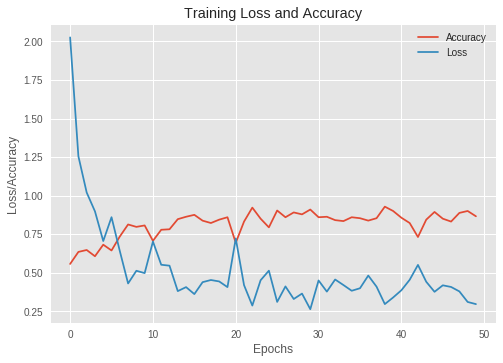

In [74]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_8.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_8.hdf5')

In [15]:
results['architecture_8'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 3s 94ms/step


In [16]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_8'][0], 100 * results['architecture_8'][1]))

Test Loss: 0.3558833417482674 | Test Accuracy: 90.97%


### 9 tentativa Accuracy: 90.62%

Modelo adaptado do **Lucas Albertins**

*   Função **SGD** para compilação


In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(SGD(lr=0.03, momentum=0.0, decay=0.0, nesterov=False), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_9.hdf5', verbose=1, save_best_only=True)

In [20]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 2s - loss: 5.3514 - acc: 0.5250 - val_loss: 7.0161 - val_acc: 0.4453

Epoch 00001: val_loss improved from inf to 7.01614, saving model to weights_architecture_9.hdf5
Epoch 2/50
 - 0s - loss: 4.1488 - acc: 0.5250 - val_loss: 1.5596 - val_acc: 0.5469

Epoch 00002: val_loss improved from 7.01614 to 1.55956, saving model to weights_architecture_9.hdf5
Epoch 3/50
 - 0s - loss: 1.2479 - acc: 0.5219 - val_loss: 0.7141 - val_acc: 0.6641

Epoch 00003: val_loss improved from 1.55956 to 0.71413, saving model to weights_architecture_9.hdf5
Epoch 4/50
 - 0s - loss: 0.7168 - acc: 0.6312 - val_loss: 0.6656 - val_acc: 0.5938

Epoch 00004: val_loss improved from 0.71413 to 0.66563, saving model to weights_architecture_9.hdf5
Epoch 5/50
 - 0s - loss: 0.6973 - acc: 0.6188 - val_loss: 0.6247 - val_acc: 0.6641

Epoch 00005: val_loss improved from 0.66563 to 0.62470, saving model to weights_architecture_9.hdf5
Epoch 6/50
 - 0s - loss: 0.5734 - acc: 0.7281 - val_loss: 0.5789 - val_acc: 0.8750



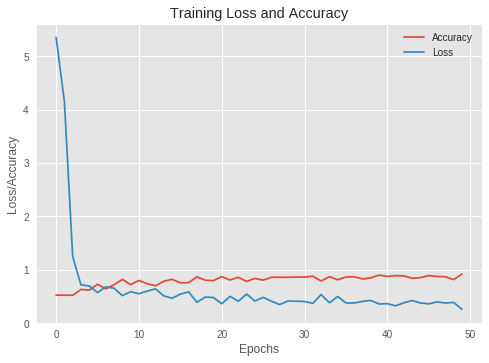

In [21]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_9.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_9.hdf5')

In [23]:
results['architecture_9'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 3s 107ms/step


In [24]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_9'][0], 100 * results['architecture_9'][1]))

Test Loss: 0.3659849464893341 | Test Accuracy: 90.62%


### 10 tentativa Accuracy: 92.68%

Modelo adaptado do **Lucas Albertins**

*   Função **adam** para compilação
*   Adicionado mais 2 camadas convolutivas

In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(96, (3, 3),activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(96, (3, 3),activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_10.hdf5', verbose=1, save_best_only=True)

In [11]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 5s - loss: 1.6741 - acc: 0.5438 - val_loss: 0.9193 - val_acc: 0.4609

Epoch 00001: val_loss improved from inf to 0.91925, saving model to weights_architecture_10.hdf5
Epoch 2/50
 - 1s - loss: 1.1832 - acc: 0.6000 - val_loss: 0.5616 - val_acc: 0.7500

Epoch 00002: val_loss improved from 0.91925 to 0.56160, saving model to weights_architecture_10.hdf5
Epoch 3/50
 - 1s - loss: 1.0042 - acc: 0.5875 - val_loss: 0.6312 - val_acc: 0.7500

Epoch 00003: val_loss did not improve from 0.56160
Epoch 4/50
 - 1s - loss: 0.7928 - acc: 0.6813 - val_loss: 0.5479 - val_acc: 0.7578

Epoch 00004: val_loss improved from 0.56160 to 0.54791, saving model to weights_architecture_10.hdf5
Epoch 5/50
 - 1s - loss: 0.6245 - acc: 0.7406 - val_loss: 0.5187 - val_acc: 0.8516

Epoch 00005: val_loss improved from 0.54791 to 0.51868, saving model to weights_architecture_10.hdf5
Epoch 6/50
 - 1s - loss: 0.5491 - acc: 0.7906 - val_loss: 0.4260 - val_acc: 0.8906

Epoch 00006: val_loss improved from 0.51868 t

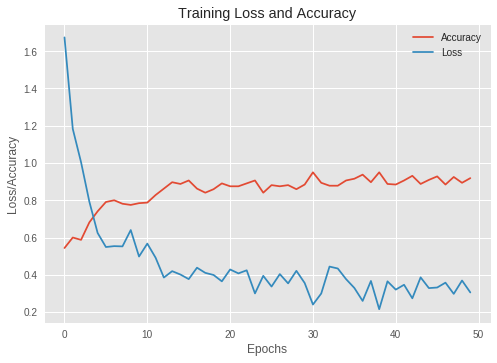

In [12]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_10.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_10.hdf5')

In [15]:
results['architecture_10'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 3s 94ms/step


In [16]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_10'][0], 100 * results['architecture_10'][1]))

Test Loss: 0.3035737951286137 | Test Accuracy: 92.68%


### 11 tentativa Accuracy: 90.43%

Modelo adaptado do **Lucas Albertins**

*   Função **SGD** para compilação
*   Adicionado mais 2 camadas convolutivas

In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4), 
                 input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(96, (3, 3),activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(Conv2D(96, (3, 3),activation='relu', kernel_regularizer=l2(1e-4)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1), kernel_regularizer=l2(1e-4)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu', kernel_regularizer=l2(1e-4)))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2(1e-4)))

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_11.hdf5', verbose=1, save_best_only=True)

In [20]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 2s - loss: 1.8787 - acc: 0.5156 - val_loss: 0.7070 - val_acc: 0.6328

Epoch 00001: val_loss improved from inf to 0.70696, saving model to weights_architecture_11.hdf5
Epoch 2/50
 - 1s - loss: 1.3892 - acc: 0.5125 - val_loss: 0.6503 - val_acc: 0.6875

Epoch 00002: val_loss improved from 0.70696 to 0.65028, saving model to weights_architecture_11.hdf5
Epoch 3/50
 - 0s - loss: 1.7570 - acc: 0.4871 - val_loss: 0.7622 - val_acc: 0.5625

Epoch 00003: val_loss did not improve from 0.65028
Epoch 4/50
 - 1s - loss: 0.9401 - acc: 0.5875 - val_loss: 0.7889 - val_acc: 0.4609

Epoch 00004: val_loss did not improve from 0.65028
Epoch 5/50
 - 1s - loss: 0.8441 - acc: 0.6437 - val_loss: 0.7139 - val_acc: 0.6016

Epoch 00005: val_loss did not improve from 0.65028
Epoch 6/50
 - 1s - loss: 0.8354 - acc: 0.5687 - val_loss: 0.7120 - val_acc: 0.5938

Epoch 00006: val_loss did not improve from 0.65028
Epoch 7/50
 - 1s - loss: 0.8375 - acc: 0.5938 - val_loss: 0.6494 - val_acc: 0.6797

Epoch 0000

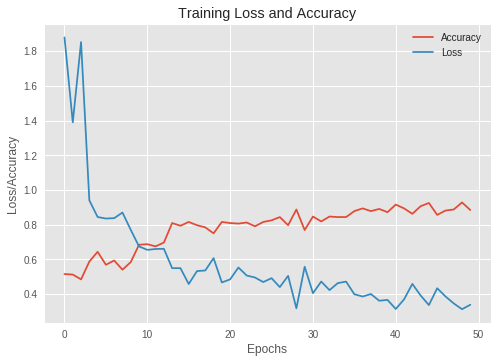

In [21]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_11.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_11.hdf5')

In [23]:
results['architecture_11'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 3s 104ms/step


In [24]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_11'][0], 100 * results['architecture_11'][1]))

Test Loss: 0.34909098595380783 | Test Accuracy: 90.43%


### 12 tentativa Accuracy: 90.04%

Modelo adaptado do **Lucas Albertins**

*   Sem utilização das funções de regularização
*   Função **SGD** para compilação
*   Adicionado mais 2 camadas convolutivas

In [0]:
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, BatchNormalization
from keras.regularizers import l2

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',input_shape=(None, None, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(96, (3, 3),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(96, (3, 3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (1,1)))
model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='sigmoid'))

In [0]:
model.compile(SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
checkpointer = ModelCheckpoint(filepath='weights_architecture_12.hdf5', verbose=1, save_best_only=True)

In [28]:
training = model.fit_generator(train_batches, steps_per_epoch=stepsPerEpoche, 
                   validation_data=validation_batches, validation_steps=validationSteps,
                   epochs=50, verbose=2, callbacks=[checkpointer])

Epoch 1/50
 - 3s - loss: 1.9276 - acc: 0.4594 - val_loss: 1.4336 - val_acc: 0.5156

Epoch 00001: val_loss improved from inf to 1.43357, saving model to weights_architecture_12.hdf5
Epoch 2/50
 - 1s - loss: 1.9171 - acc: 0.5187 - val_loss: 0.6154 - val_acc: 0.6875

Epoch 00002: val_loss improved from 1.43357 to 0.61538, saving model to weights_architecture_12.hdf5
Epoch 3/50
 - 1s - loss: 1.2434 - acc: 0.5594 - val_loss: 0.5652 - val_acc: 0.7188

Epoch 00003: val_loss improved from 0.61538 to 0.56523, saving model to weights_architecture_12.hdf5
Epoch 4/50
 - 1s - loss: 1.0904 - acc: 0.5687 - val_loss: 0.6488 - val_acc: 0.6094

Epoch 00004: val_loss did not improve from 0.56523
Epoch 5/50
 - 1s - loss: 0.8088 - acc: 0.6312 - val_loss: 0.5491 - val_acc: 0.7656

Epoch 00005: val_loss improved from 0.56523 to 0.54906, saving model to weights_architecture_12.hdf5
Epoch 6/50
 - 0s - loss: 1.0137 - acc: 0.5635 - val_loss: 0.6762 - val_acc: 0.5938

Epoch 00006: val_loss did not improve from 0.

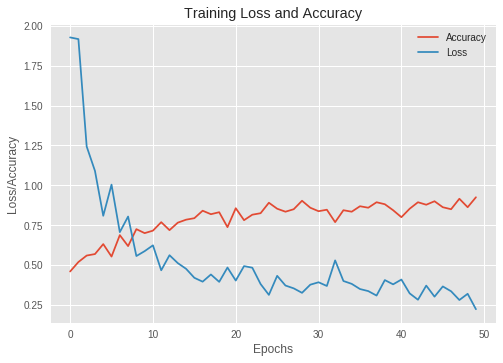

In [29]:
# plotar loss e accuracy para os datasets 'train' e 'test'
plt.style.use("ggplot")
plt.figure()
plt.plot(training.history['acc'], label='Accuracy')
plt.plot(training.history['loss'], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training Loss and Accuracy")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('architecture_12.png', bbox_inches='tight')

In [0]:
model.load_weights('weights_architecture_12.hdf5')

In [31]:
results['architecture_12'] = model.evaluate_generator(test_batches, steps=bSize, use_multiprocessing=True, verbose=1)

32/32 [==============================] - 3s 107ms/step


In [32]:
print('Test Loss: {} | Test Accuracy: {:.2f}%'.format(results['architecture_12'][0], 100 * results['architecture_12'][1]))

Test Loss: 0.30304796900600195 | Test Accuracy: 90.04%
